In [1]:

#* umap https://towardsdatascience.com/customer-reviews-analysis-using-nlp-the-netflix-use-case-92b3645770e1
import pandas as pd
import numpy as np
import os


%matplotlib inline



In [2]:
if os.path.exists(f"../data/tmp/tmp120000.csv") and os.path.exists(
    f"../data/tmp/sample120000.csv"
):
    tmp_df = pd.read_csv(f"../data/tmp/tmp120000.csv")
    sample_df = pd.read_csv(f"../data/tmp/sample120000.csv")
    sample_df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
    sample_df.drop(["Unnamed: 0.1"], axis=1, inplace=True)
    # sample_df.set_index("Unnamed: 0",inplace=True)


In [3]:
# * Juntando banco com banco de vetores pós bert (pooled)
# * Tirando Linhas com NA


sample_df_with_arrays = pd.concat([sample_df, tmp_df], axis=1)
sample_df_with_arrays.dropna(inplace=True)
sample_df_with_arrays.set_index("index", inplace=True)


In [4]:
# * Lista com variáveis que não vamos usar na modelagem
# * pegando dummies das lojas

var_not_sel = [
    "id_",
    "id_user",
    "date",
    "comment_size",
    "comment_with_date",
    "comment_with_specific_hour",
    "comment_mentions_hour",
    "comment_mentions_day",
    "comment_number_of_dates",
    "comment_number_day",
    "comment_number_hour",
    "comment_number_specific_hour",
    "comment",
    "clean_comment_word_count",
]

sample_df_with_arrays.drop(var_not_sel, axis=1, inplace=True)
sample_df_with_arrays["loja"] = pd.Categorical(sample_df_with_arrays["loja"])
sample_df_with_arrays = pd.concat(
    [sample_df_with_arrays, pd.get_dummies(sample_df_with_arrays["loja"])],
    axis=1,
)
sample_df_with_arrays.drop(["loja"], inplace=True, axis=1)
sample_df_with_arrays["score"] = pd.Categorical(sample_df_with_arrays["score"])


In [5]:
from sklearn.preprocessing import StandardScaler

data = sample_df_with_arrays.drop(["comment_clean"], axis=1)
X = StandardScaler().fit_transform(data)


In [6]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


In [8]:
from sklearn import metrics

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Estimated number of clusters: 227
Estimated number of noise points: 117962
Silhouette Coefficient: -0.318


In [9]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [
    plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
]


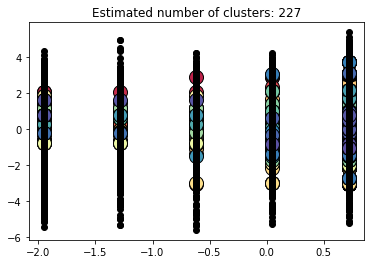

In [10]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


In [11]:
np.unique(labels, return_counts=True)
df_final = pd.concat(
    [
        sample_df_with_arrays.reset_index(),
        pd.DataFrame(labels, columns=["label"]),
    ],
    axis=1,
)
df_final.set_index("index", inplace=True)


In [12]:
import hdbscan

In [13]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)